## Importing necessary libraries for data analysis

In [6]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the dataset file structure

In [7]:
dataset_path = "./animals-10"
animal_classes = os.listdir(dataset_path)
print("Animal classes found: ", animal_classes)
print("Number of classes: ", len(animal_classes))

Animal classes found:  ['cow', 'dog', 'chicken', 'horse', 'butterfly', 'sheep', 'spider', 'cat', 'squirrel', 'elephant']
Number of classes:  10


## Analyzing class distribution and dataset statistics

In [9]:
class_counts = {}
class_file_samples = {}
image_properties = []
formats = {}
corrupted_files = []

for animal_class in animal_classes:
    class_path = os.path.join(dataset_path, animal_class)

    # get all image file names (using both .jpg and .jpeg since there a files of both extensions)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    class_counts[animal_class] = len(image_files)
    class_file_samples[animal_class] = image_files[:3]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                file_size = os.path.getsize(img_path) / 1024 # size in KB

                # store image properties data
                image_properties.append({
                    'class': animal_class,
                    'width': width,
                    'height': height,
                    'file_size_kb': file_size,
                    'aspect_ratio': width / height
                })

                # store format data
                format_type = img.format
                formats[format_type] = formats.get(format_type, 0) + 1
        except Exception as e:
            corrupted_files.append((img_path, str(e)))


df_stats = pd.DataFrame({
    'class': list(class_counts.keys()),
    'count': list(class_counts.values())
})

df_properties = pd.DataFrame(image_properties)

print("\nDataset statistics")
print(df_stats)
print(f"\nTotal images: {df_stats['count'].sum()}")


print(f"\nImage formats: {formats}")
print(f"Corrupted files found: {len(corrupted_files)}")

print("\nImage properties summary")
print(df_properties.describe())


Dataset statistics
       class  count
0        cow   1866
1        dog   4863
2    chicken   3098
3      horse   2623
4  butterfly   2112
5      sheep   1820
6     spider   4821
7        cat   1668
8   squirrel   1862
9   elephant   1446

Total images: 26179

Image formats: {'JPEG': 26128, 'PNG': 51}
Corrupted files found: 0

Image properties summary
              width        height  file_size_kb  aspect_ratio
count  26179.000000  26179.000000  26179.000000  26179.000000
mean     320.038810    252.630162     22.917355      1.311385
std      196.935326    148.403298    108.143402      0.311234
min       60.000000     57.000000      1.420898      0.293333
25%      300.000000    200.000000     10.192383      1.136364
50%      300.000000    225.000000     13.213867      1.333333
75%      300.000000    300.000000     17.011230      1.500000
max     6720.000000   6000.000000   5443.840820      4.225352


## Visualize class distribution

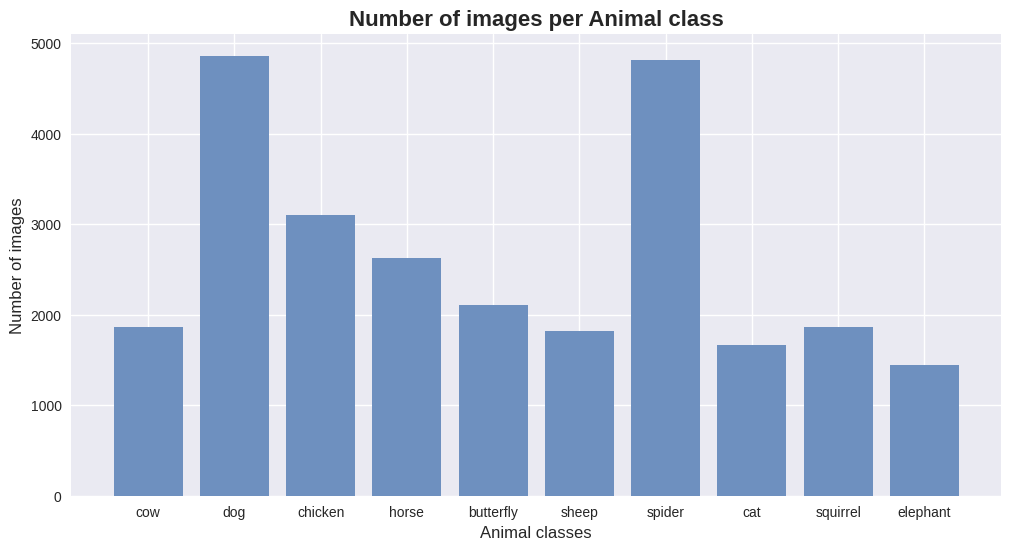

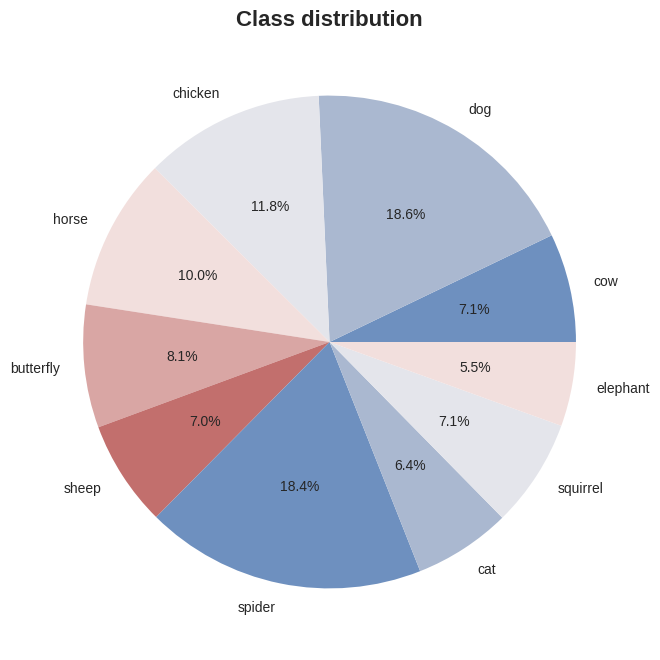

In [10]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("vlag")

# Bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(df_stats['class'], df_stats['count'])
plt.title('Number of images per Animal class', fontsize=16, fontweight='bold')
plt.xlabel('Animal classes', fontsize=12)
plt.ylabel('Number of images', fontsize=12)
plt.show()

# Pie chart
plt.figure(figsize=(10,8))
plt.pie(df_stats['count'], labels=df_stats['class'], autopct='%1.1f%%')
plt.title('Class distribution', fontsize=16, fontweight='bold')
plt.show()

## Visualize image properties

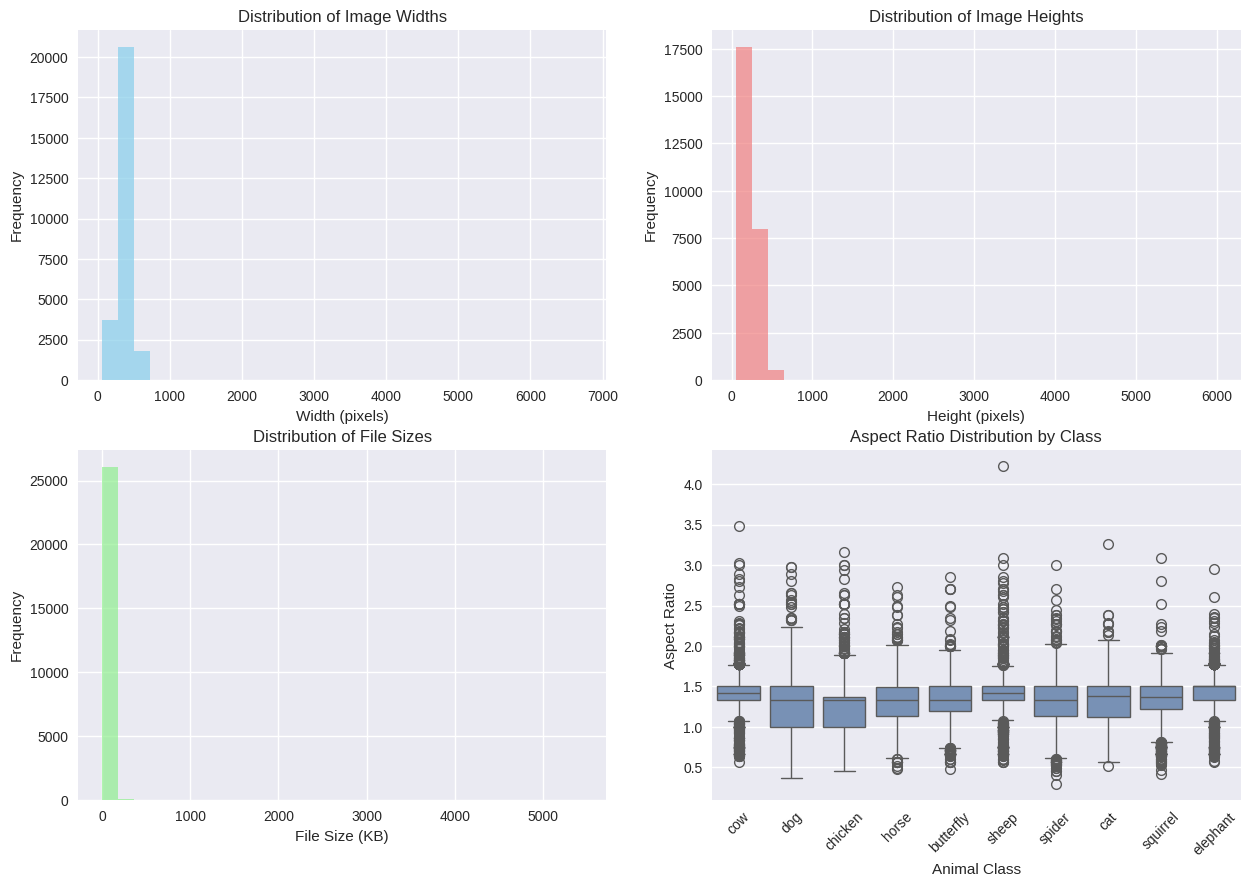

In [13]:
# Plot image dimensions distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Width distribution
axes[0,0].hist(df_properties['width'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Image Widths')
axes[0,0].set_xlabel('Width (pixels)')
axes[0,0].set_ylabel('Frequency')

# Height distribution
axes[0,1].hist(df_properties['height'], bins=30, alpha=0.7, color='lightcoral')
axes[0,1].set_title('Distribution of Image Heights')
axes[0,1].set_xlabel('Height (pixels)')
axes[0,1].set_ylabel('Frequency')

# File size distribution
axes[1,0].hist(df_properties['file_size_kb'], bins=30, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Distribution of File Sizes')
axes[1,0].set_xlabel('File Size (KB)')
axes[1,0].set_ylabel('Frequency')

# Aspect ratio by class
sns.boxplot(data=df_properties, x='class', y='aspect_ratio', ax=axes[1,1])
axes[1,1].set_title('Aspect Ratio Distribution by Class')
axes[1,1].set_xlabel('Animal Class')
axes[1,1].set_ylabel('Aspect Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.show()

## Analysis Summary

### Data Quality

* Images are representative and relevant to the task.
* All images appear to be correctly labeled.
* No corrupted or unreadable images were detected.
* **Mean width × height = 320 × 253 px**, indicating that on average, the images are small to medium-sized, which is suitable for training a model, though they can be safely resized to **224 × 224 px** for consistency.
* **Mean aspect ratio = 1.31**, meaning most images are slightly wider than tall (width > height).
* **File sizes:** Mean = 22.9 KB, but **std = 108 KB** and **max = 5.4 MB**, showing large variation - many small files (JPEGs) and some high-resolution or PNG images (those 50). The larger files could slow down training.

---

### Data Quantity

* The dataset contains **over 26,000 images**, which is sufficient for a moderately complex model.
* Each class has **at least 1,500 images**, providing a solid foundation for learning.
* A few classes contain **3,000–4,800 images**, which may require **balancing or class-weight adjustments** to prevent bias toward overrepresented classes.

---

### Data Diversity

* A brief visual inspection shows **good diversity** across:

  * **Viewpoints** – animals captured from various angles and poses.
  * **Lighting conditions** – includes both well-lit and dimly lit images.
  * **Backgrounds** – mixture of indoor, outdoor, and natural scenes.
* Overall, the dataset appears to be **sufficiently diverse for training a general-purpose image classifier**.

---

### Legal Considerations

* The dataset is released under the **GNU General Public License v2 (GPL-2.0)**.
* This means it can be **freely used, modified, and distributed**, but any derivative datasets or models **must also be distributed under the same license** if shared publicly.

---

### Next preprocessing steps

* **Resize all images** to a fixed input size (e.g., 224×224).
* **Normalize file sizes** (e.g., compress or convert large images) to maintain consistent quality and speed up file reading.
* **Inspect and filter outliers** with extreme aspect ratios or resolutions that may distort feature extraction.
* **Balance class representation** using augmentation, class weights, or sampling strategies if some classes have far more images than others.
* Optional: **Apply data augmentation** (rotation, flipping, brightness, and contrast) to further enhance generalization.

---